In [1]:
# Import Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
# Connect to SQLite (this will create a file 'sales_data.db' inside Colab)
conn = sqlite3.connect('sales_data.db')
cur = conn.cursor()

# Create sales table
cur.execute('''
CREATE TABLE IF NOT EXISTS sales(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
''')
conn.commit()


In [3]:
# Insert Values
sample = [
    ('T-shirt', 10, 299.0, '2025-09-20'),
    ('T-shirt', 5, 299.0, '2025-09-21'),
    ('Mug', 20, 199.0, '2025-09-20'),
    ('Mug', 5, 199.0, '2025-09-22'),
    ('Notebook', 7, 149.0, '2025-09-21')
]

cur.executemany('INSERT INTO sales(product,quantity,price,sale_date) VALUES (?,?,?,?)', sample)
conn.commit()


In [4]:
# Total Revenue by Product
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)


    product  total_qty  revenue
0       Mug         25   4975.0
1  Notebook          7   1043.0
2   T-shirt         15   4485.0


    product  total_qty  revenue
0       Mug         25   4975.0
1  Notebook          7   1043.0
2   T-shirt         15   4485.0


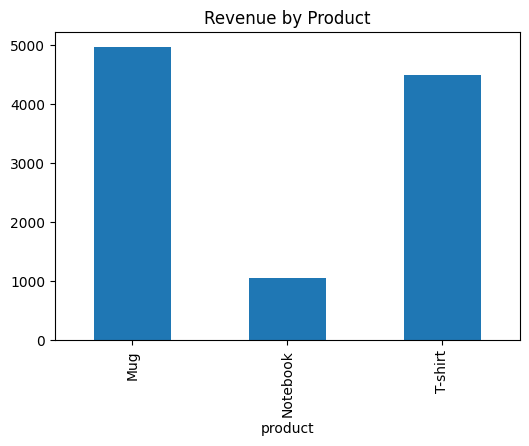

In [11]:
# Revenue by Product with Visuals
query1 = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df1 = pd.read_sql_query(query1, conn)
print(df1)

df1.plot(kind='bar', x='product', y='revenue', legend=False, figsize=(6,4), title='Revenue by Product')
plt.show()


    sale_date  daily_revenue
0  2025-09-20         6970.0
1  2025-09-21         2538.0
2  2025-09-22          995.0


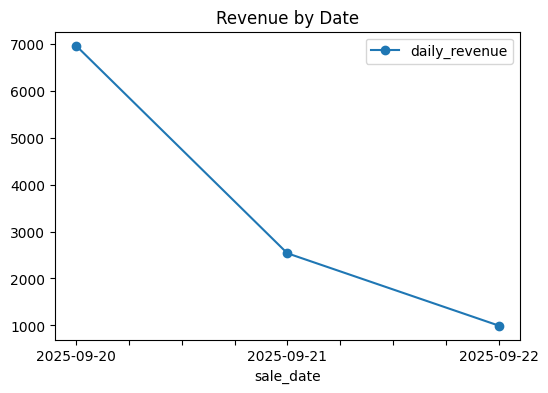

In [12]:
# Total Revenue by Date (to see daily sales trend)
query2 = """
SELECT sale_date,
       SUM(quantity * price) AS daily_revenue
FROM sales
GROUP BY sale_date
ORDER BY sale_date
"""
df2 = pd.read_sql_query(query2, conn)
print(df2)

df2.plot(kind='line', x='sale_date', y='daily_revenue', marker='o', figsize=(6,4), title='Revenue by Date')
plt.show()


  product  total_qty
0     Mug         25


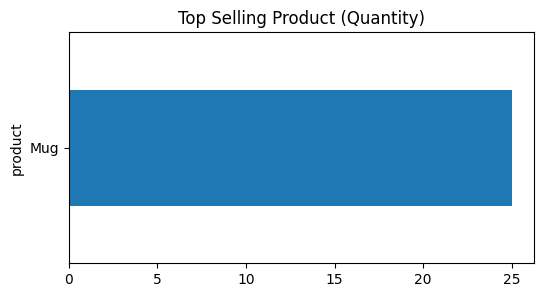

In [13]:
# Best-Selling Product (by Quantity)

query3 = """
SELECT product,
       SUM(quantity) AS total_qty
FROM sales
GROUP BY product
ORDER BY total_qty DESC
LIMIT 1
"""
df3 = pd.read_sql_query(query3, conn)
print(df3)

df3.plot(kind='barh', x='product', y='total_qty', legend=False, figsize=(6,3), title='Top Selling Product (Quantity)')
plt.show()


    product  avg_price
0       Mug      199.0
1  Notebook      149.0
2   T-shirt      299.0


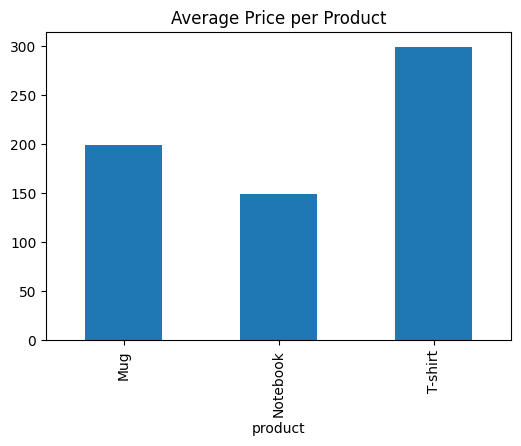

In [14]:
# Average Price of Each Product
query4 = """
SELECT product,
       AVG(price) AS avg_price
FROM sales
GROUP BY product
"""
df4 = pd.read_sql_query(query4, conn)
print(df4)

df4.plot(kind='bar', x='product', y='avg_price', legend=False, figsize=(6,4), title='Average Price per Product')
plt.show()


In [16]:
# Close the Connection
conn.close()
print("✅ Task 7 completed successfully!")

✅ Task 7 completed successfully!
